In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("C:/Users/C5295630/Documents/DataScience/Assignment/EastWestAirlines.xlsx")
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
from sklearn import preprocessing
standard_data = preprocessing.scale(data.iloc[:,1:])
print(standard_data)
standard_data = pd.DataFrame(standard_data)

[[-4.51140783e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.39545434e+00 -7.66919299e-01]
 [-5.39456874e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.37995704e+00 -7.66919299e-01]
 [-3.20031232e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
   1.41192021e+00 -7.66919299e-01]
 ...
 [-4.29480975e-05 -1.86298687e-01  6.83121167e-01 ... -3.62167870e-01
  -1.31560393e+00  1.30391816e+00]
 [-1.85606976e-01 -1.86298687e-01 -7.69578406e-01 ... -9.85033311e-02
  -1.31608822e+00 -7.66919299e-01]
 [-7.00507951e-01 -1.86298687e-01 -7.69578406e-01 ... -3.62167870e-01
  -1.31754109e+00 -7.66919299e-01]]


In [4]:
wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(standard_data)
    wcss.append(kmeans.inertia_)


Text(0, 0.5, 'wcss')

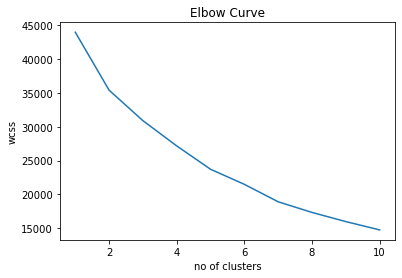

In [13]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Curve')
plt.xlabel('no of clusters')
plt.ylabel('wcss')

In [7]:
cluster_new = KMeans(n_clusters=7,random_state=51)
cluster_new.fit(standard_data)

KMeans(n_clusters=7, random_state=51)

In [9]:
cluster_new.labels_

array([2, 2, 2, ..., 4, 0, 0])

In [11]:
data['cluster_new.labels_']=cluster_new.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_new.labels_
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
